# Forward inverse rendering

In [1]:
import drjit as dr
import mitsuba as mi

In [2]:
mi.set_variant('llvm_ad_rgb')

In [3]:
scene = mi.load_file('../../scenes/cbox.xml', max_depth=4)

2022-03-09 13:56:59 INFO main [xml.cpp:1260] Loading XML file "../scenes/cbox.xml" with variant "llvm_ad_rgb"..

2022-03-09 13:56:59 INFO main [Scene] Embree ready. (took 2ms)

2022-03-09 13:56:59 INFO main [xml.cpp:1319] Done loading XML file "../scenes/cbox.xml" (took 32ms).

In [4]:
params = mi.traverse(scene)
dr.enable_grad(params['green.reflectance.value'])
params.update()

In [5]:
image = mi.render(scene, params, spp=512)

2022-03-09 13:57:00 INFO main [SamplingIntegrator] Starting render job (256x256, 512 samples)

2022-03-09 13:57:00 INFO main [SamplingIntegrator] Computation graph recorded. (took 9ms)

In [6]:
dr.forward(params['green.reflectance.value'])
grad_image = dr.grad(image)

2022-03-09 13:57:03 INFO main [SamplingIntegrator] Starting render job (256x256, 512 samples)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


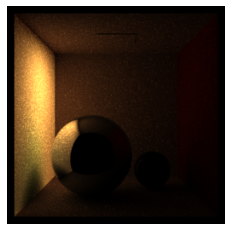

In [9]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(grad_image * 2);